# Context specific network analysis
This is a brief single-notebook tutorial to reproduce context specific gene regulatory network analyses in the paper. For a tutorial on function usage and dynamic network analysis, see [analysis-blood](https://github.com/pinellolab/dictys/tree/master/doc/tutorials/analysis-blood). For a tutorial on network inference, see [full-skin](https://github.com/pinellolab/dictys/tree/master/doc/tutorials/full-skin), [short-multiome](https://github.com/pinellolab/dictys/tree/master/doc/tutorials/short-multiome), and [full-multiome](https://github.com/pinellolab/dictys/tree/master/doc/tutorials/full-multiome).

## Configuration

In [1]:
# Removes CPU usage limit by some jupyter versions
import os
os.environ['KMP_AFFINITY'] = ''
# Download network data from zenodo
!cd .. && dictys_helper repodown.sh zenodo analysis-skin.tar.xz


## Load data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import dictys
from dictys.net import network
# Reconstructed network with peak-expression association filter
d0=network.from_file('../data/static-expression-associated.h5')
# Reconstructed network without peak-expression association filter
d1=network.from_file('../data/static.h5')


## Regulation marker TF discovery with dot plot

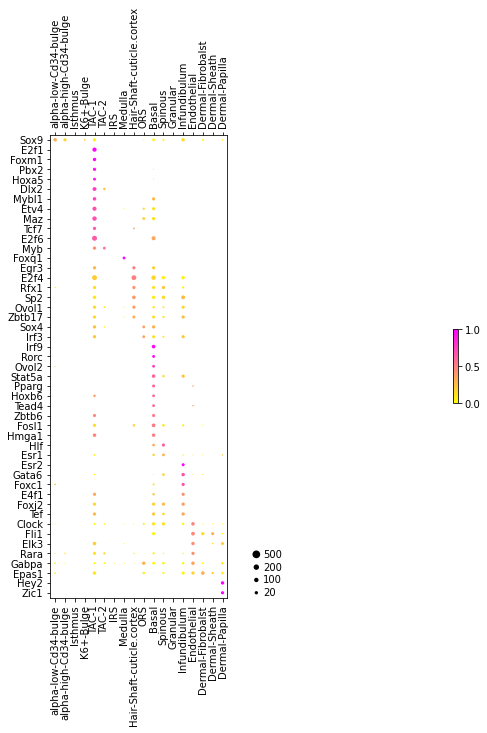

In [3]:
from dictys.plot.static import compute_spec,fig_heatmap_reg_spec
from dictys.plot import dotplot,heatmap

#Cell cluster/type/state names selection & ordering for marker gene detection/visualization
select_state='alpha-low-Cd34-bulge,alpha-high-Cd34-bulge,Isthmus,K6+-Bulge,TAC-1,TAC-2,IRS,Medulla,Hair-Shaft-cuticle.cortex,ORS,Basal,Spinous,Granular,Infundibulum,Endothelial,Dermal-Fibrobalst,Dermal-Sheath,Dermal-Papilla'.split(',')
#Compute regulatory activity, expression, and their specificity for TFs
n,v,cpm,cpm_v,reg,reg_s=compute_spec(d0,select_state=select_state,min_entropy=0.7,ncut=0.3,vmin=8)

#Color map
cmap='spring_r'
#Node sizes to draw legend in dot plot for regulation
node_size_target=[20,100,200,500]
#Transformation from target count to node size for regulation
node_size_map_target=lambda x:x*(x<=10)+(10+(x-10)*500/10/490)*(x>10)

#Draw dot plot with top regulation marker genes
fig,ax=dotplot(n.loc[reg].iloc[::-1],v.loc[reg].iloc[::-1],size_transform=node_size_map_target,sizes=np.array(node_size_target),cmap=cmap)
#Top labels
ax.tick_params(top=True,labeltop=True)


The same dot plot on expression level and expression specificity for the same regulation marker genes

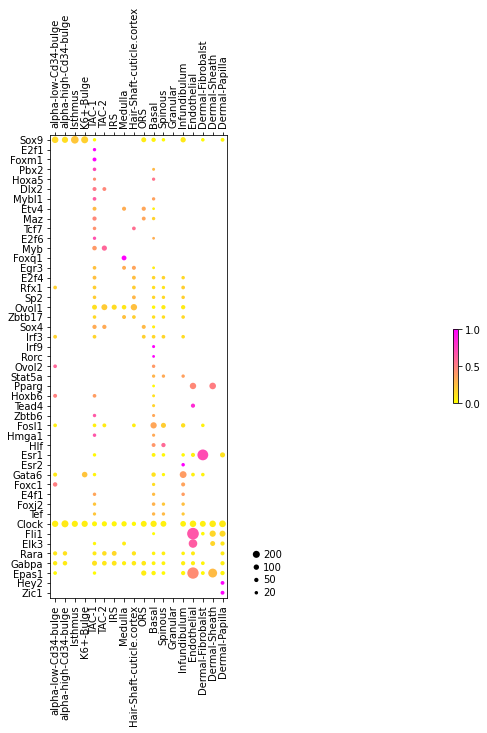

In [4]:
#Node sizes to draw legend in dot plot for expression (CPM)
node_size_cpm=[20,50,100,200]
#Transformation from target count to node size for regulation
node_size_map_cpm=lambda x:x*(x<=10)+(10+(x-10)*250/5/240)*(x>10)

#Draw dot plot of expression level and expression specificity with top regulation marker genes
fig2,ax2=dotplot(cpm.loc[reg].iloc[::-1],cpm_v.loc[reg].iloc[::-1],size_transform=node_size_map_cpm,sizes=np.array(node_size_cpm),cmap=cmap)
ax2.tick_params(top=True,labeltop=True)


## Scatter plot and bar plot of differential regulation & differential expression between two cell clusters
### Basal v.s. TAC-1
Scatter plot of diffferential regulation & differential expression logFCs

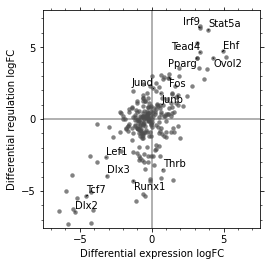

In [5]:
from dictys.plot.static import fig_diff_scatter

#Cell type/state names to compare in (reference, alternative) format
states=('TAC-1','Basal')
#TFs to annotate
annotate='Irf9,Stat5a,Tead4,Ehf,Pparg,Ovol2,Fos,Jund,Junb,Thrb,Lef1,Dlx3,Tcf7,Runx1,Dlx2'.split(',')

fig=plt.figure()
ax=fig.add_subplot(111)
data=fig_diff_scatter(d0,ax,states,annotate=annotate)


Bar plot of logFC based ranking

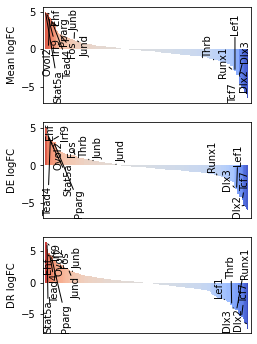

In [6]:
from dictys.plot.static import fig_diff_rank

fig=fig_diff_rank(data,annotate=annotate)


## Draw inferred regulator TFs of a target gene as subnetwork
### Dlx3 regulators in TAC-1
With open chromatin region-gene relation filter from peak-gene associations

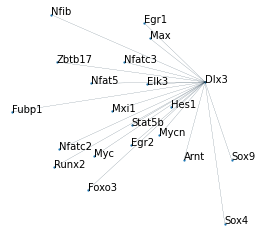

In [7]:
from dictys.plot.static import fig_subnet
#Sparsity to binarize network: this proportion of edges will be regarded as positive to draw the subnetwork. Defaults to 0.01
sparsity=0.05
#List of genes to annotate
annotate='all'

fig=plt.figure()
ax=fig.add_subplot(111)
nodes,edges=fig_subnet(d0,ax,'TAC-1',targets=['Dlx3'],sparsity=sparsity,annotate=annotate)


Without open chromatin region-gene relation filter from peak-gene associations

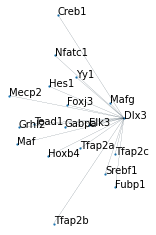

In [8]:
fig=plt.figure()
ax=fig.add_subplot(111)
nodes,edges=fig_subnet(d1,ax,'TAC-1',targets=['Dlx3'],sparsity=sparsity,annotate=annotate)
